In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_vgsales.csv')

In [3]:
df_cleaned.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### The number of game releases has changed over the years.

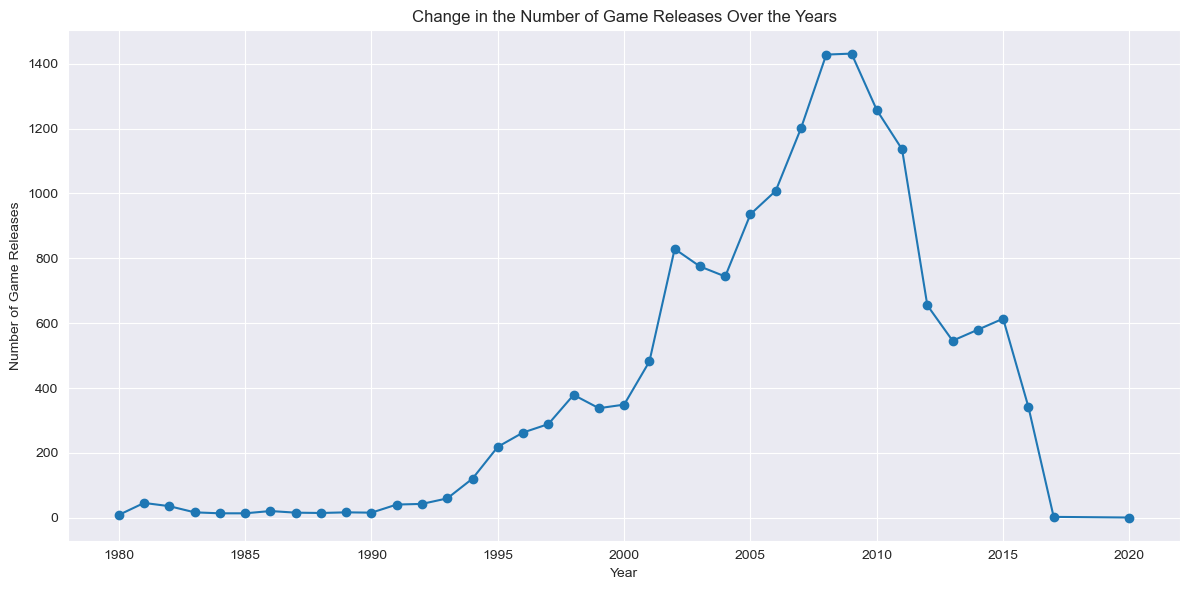

In [4]:
# Group the data by "Year" and calculate the count of game releases
game_releases_by_year = df_cleaned.groupby('Year')['Name'].count()

# Create a line plot to visualize the change in the number of game releases over time
plt.figure(figsize=(12, 6))
plt.title('Change in the Number of Game Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Game Releases')
plt.plot(game_releases_by_year.index, game_releases_by_year.values, marker='o', linestyle='-')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

##### Noticeable trends in global sales over time

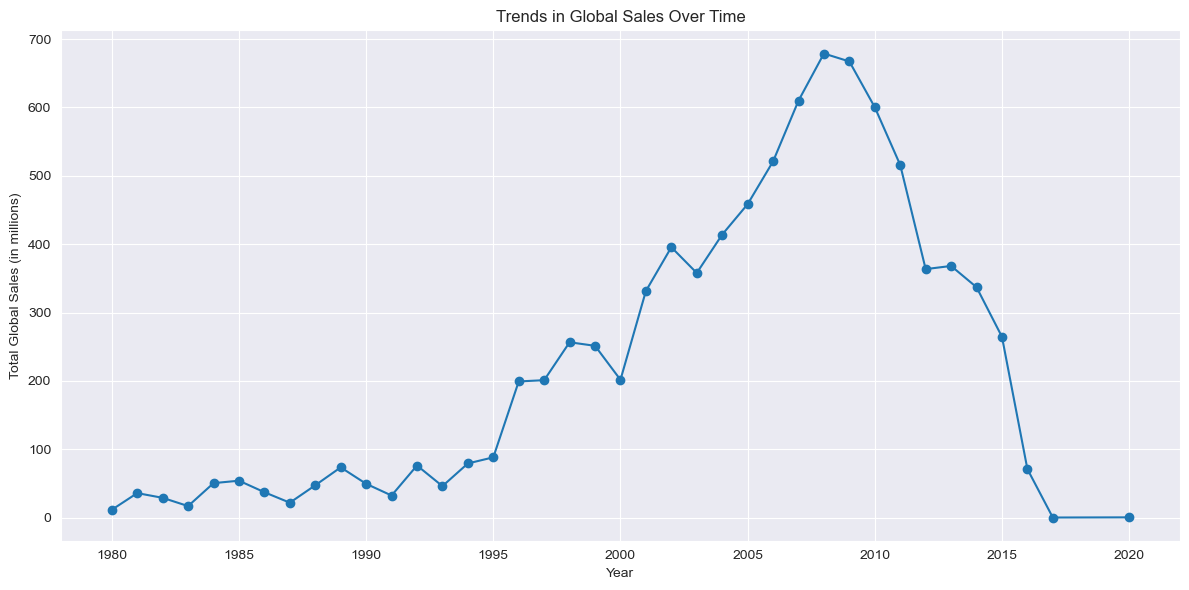

In [5]:
# Group the data by "Year" and calculate total global sales
global_sales_by_year = df_cleaned.groupby('Year')['Global_Sales'].sum()

# Create a line plot to visualize trends in global sales over time
plt.figure(figsize=(12, 6))
plt.title('Trends in Global Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.plot(global_sales_by_year.index, global_sales_by_year.values, marker='o', linestyle='-')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#####  Identify any significant spikes or drops in sales in specific years

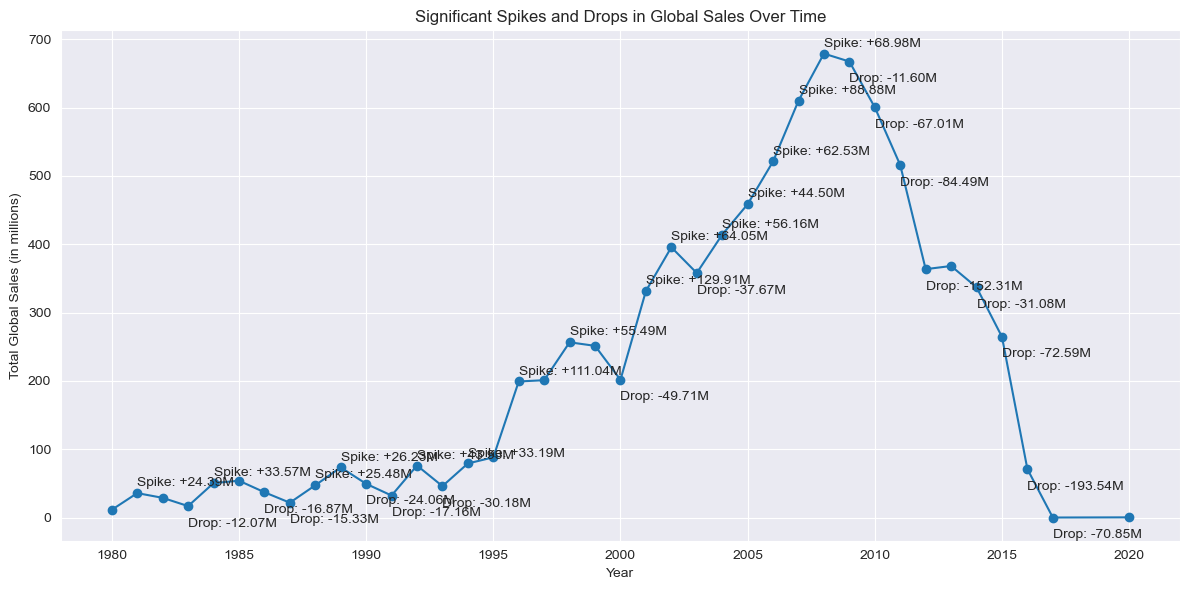

In [6]:
# Group the data by "Year" and calculate total global sales
global_sales_by_year = df_cleaned.groupby('Year')['Global_Sales'].sum()

# Calculate differences in global sales between consecutive years
sales_diff = global_sales_by_year.diff()

# Set a threshold for significant change (e.g., 10 million)
significant_change_threshold = 10

# Identify years with significant spikes or drops in sales
significant_years = sales_diff[(sales_diff.abs() >= significant_change_threshold) & (sales_diff.index != global_sales_by_year.index[0])]

# Create a line plot to visualize trends in global sales over time
plt.figure(figsize=(12, 6))
plt.title('Significant Spikes and Drops in Global Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.plot(global_sales_by_year.index, global_sales_by_year.values, marker='o', linestyle='-')
plt.grid(True)

# Annotate significant spikes and drops on the plot
for year, sales_change in significant_years.items():
    if sales_change > 0:
        plt.annotate(f'Spike: +{sales_change:.2f}M', xy=(year, global_sales_by_year[year]), xytext=(year, global_sales_by_year[year] + 10))
    else:
        plt.annotate(f'Drop: {sales_change:.2f}M', xy=(year, global_sales_by_year[year]), xytext=(year, global_sales_by_year[year] - 30))

# Show the plot
plt.tight_layout()
plt.show()